In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading CSV Dataset

In [2]:
df = pd.read_csv("airlines_flights_data.csv")
df

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## Data Cleaning

In [3]:
# removing unwanted column
df.drop( columns = 'index', inplace = True)

In [4]:
df.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


Dataset Information 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


## Statistical Summary about the Dataset

In [6]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


## Filtering

In [7]:
# max flight price details
df[df['price'] == 123071.000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.5,3,123071


In [8]:
# max duration of flight details
df[df['duration'] == 49.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [9]:
# max days left flight details
df[df['days_left'] == 49.000000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
9782,Vistara,UK-975,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.00,49,2476
9783,Vistara,UK-953,Delhi,Night,zero,Night,Mumbai,Economy,2.17,49,2476
9784,Vistara,UK-981,Delhi,Night,zero,Night,Mumbai,Economy,2.17,49,2476
9785,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,49,2700
9786,Vistara,UK-993,Delhi,Afternoon,zero,Afternoon,Mumbai,Economy,2.17,49,2700
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


## **EXPLORATORY DATA ANALYSIS (EDA)**

## What are the airlines in the dataset, accompanied by their frequencies?

In [10]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
# checking number of airlines in the dataset
df['airline'].nunique()

6

In [12]:
# showing airline names in the dataset
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [13]:
# showing all the Airline names with their Frequencies
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

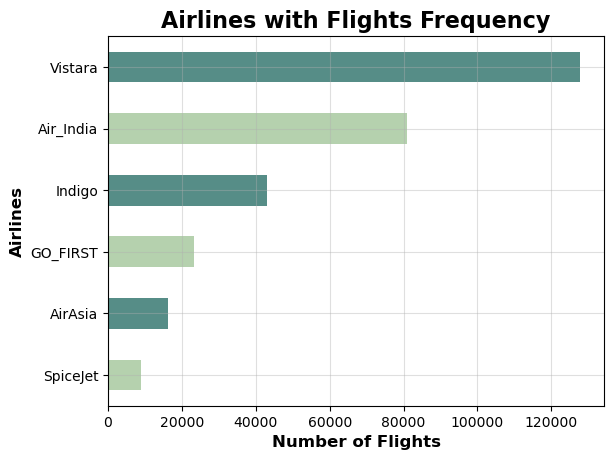

In [14]:
# plotting Airline names with their frequencies in a Horizontal Bar Graph
df['airline'].value_counts(ascending=True).plot.barh( color= ['#b5d1ae', '#568d87'])

plt.title('Airlines with Flights Frequency', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Number of Flights', fontdict={'fontsize':12, 'fontweight':'semibold'})
plt.ylabel('Airlines', fontdict={'fontsize':12, 'fontweight':'semibold'})
plt.grid(alpha = 0.4)
plt.show()

###  Airlines With Their Flight Frequencies

This horizontal bar chart displays the number of flights operated by each airline in the dataset.

- **Vistara** has the highest frequency of flights, making it the most represented airline in the dataset.
- **Air India** follows with the second-highest flight count.
- **Indigo** and **GO_FIRST** operate a moderate number of flights.
- **AirAsia** and **SpiceJet** have relatively fewer flights.

## Visualizing Flights Frequency at Departure Time and Arrival Time

In [15]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [16]:
# Departure Time Flight Frequency
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [17]:
# Arrival Time Flight Frequency
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

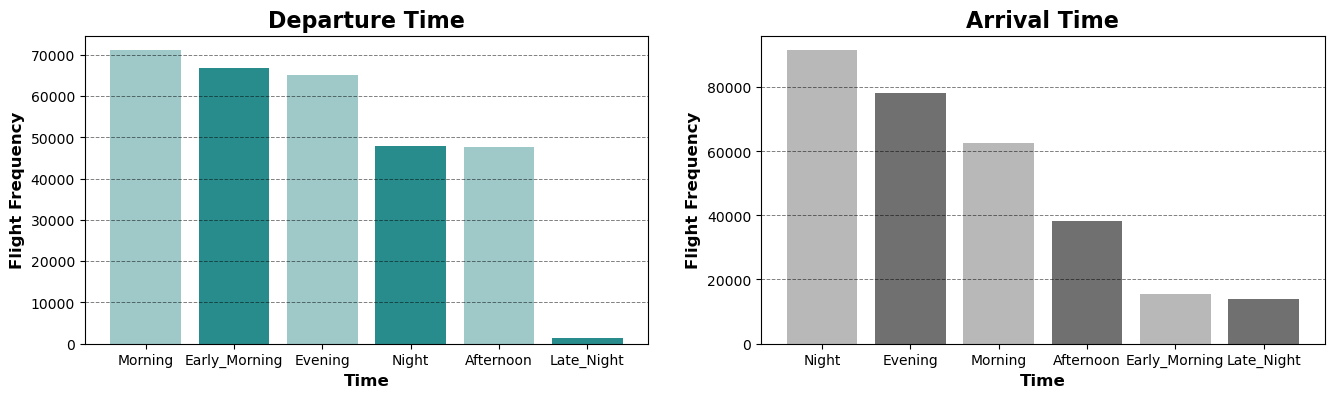

In [18]:
# plotting 
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)

plt.bar(df['departure_time'].value_counts().index, df['departure_time'].value_counts().values, color= ['#9fc8c8', '#298c8c'] )
plt.title('Departure Time', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Time', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Flight Frequency', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.7, color= 'black') 

plt.subplot(1,2,2)
plt.bar(df['arrival_time'].value_counts().index, df['arrival_time'].value_counts().values, color = ['#b8b8b8', '#707070'] )
plt.title('Arrival Time', fontdict={'fontsize':16, 'fontweight':'bold'})
plt.xlabel('Time', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.ylabel('Flight Frequency', fontdict={'fontsize':12, 'fontweight':'bold'})
plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.7, color= 'black')



plt.show()

### Departure & Arrival Time — Flight Frequency Overview

This pair of bar charts shows how often flights depart and arrive during different times of the day.

- **Evening** and **Early Morning** have the highest *departure* frequencies.
- **Night** departures are also common, while **Afternoon** shows the lowest volume.
- For *arrivals*, **Evening** sees the most traffic, followed by **Morning**.
- **Late Night** and **Early Morning** arrivals occur far less frequently.

**Insight:**  
Most flights are scheduled during high-demand hours (Evening & Early Morning), while Afternoon and Late-Night windows remain less utilized. This pattern indicates airline preference for peak travel periods based on passenger demand.


## Visualizing Flight Frequency at Source City and Destination City

In [19]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [20]:
# Flight Frequency at Source City
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [21]:
# Flight Frequency at Destination City
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

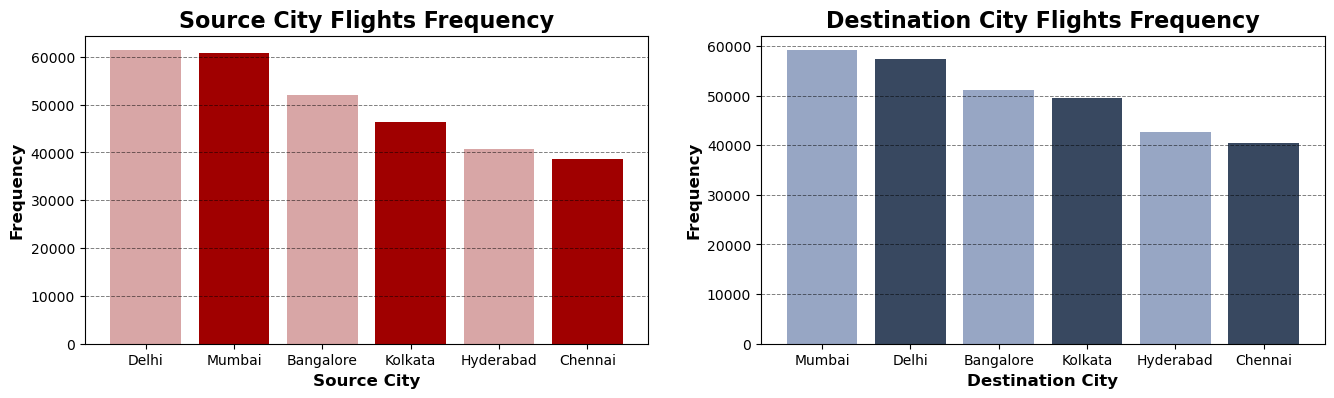

In [22]:
# plotting
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)

plt.bar(df['source_city'].value_counts().index, df['source_city'].value_counts().values, color = ['#d8a6a6', '#a00000'])
plt.title('Source City Flights Frequency', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Source City', fontdict={'fontsize': 12, 'fontweight':'bold'})
plt.ylabel('Frequency', fontdict={'fontsize': 12, 'fontweight':'bold'})
plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.7, color='black')

plt.subplot(1,2,2)

plt.bar(df['destination_city'].value_counts().index, df['destination_city'].value_counts().values, color = ['#97a6c4', '#384860'] )
plt.title('Destination City Flights Frequency', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Destination City', fontdict={'fontsize': 12, 'fontweight':'bold'})
plt.ylabel('Frequency', fontdict={'fontsize': 12, 'fontweight':'bold'})
plt.grid(axis='y', alpha=0.5, linestyle='--', linewidth=0.7, color='black')

plt.show()

### Source & Destination City — Flight Frequency Overview

This pair of bar charts shows how often cities appear as **flight origins (source)** and **flight destinations**.

- **Delhi** and **Mumbai** have the highest *departure* frequencies.
- **Bangalore**, **Kolkata**, **Hyderabad**, and **Chennai** show moderate outbound traffic.
- As *destinations*, **Mumbai**, **Delhi**, and **Bangalore** receive the most arrivals.
- **Kolkata**, **Hyderabad**, and **Chennai** receive fewer incoming flights compared to major hubs.

**Insight:**  
India’s domestic air traffic is concentrated around major metro hubs like **Delhi**, **Mumbai**, and **Bangalore**, reflecting strong passenger demand and strategic airline scheduling around these cities.


## Does Price varies with Airlines?

In [23]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [24]:
# Checking Price Variation of Airlines
df.groupby('airline')['price'].mean()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64

**Visualizing Price Variations with Airlines**

<Figure size 1000x400 with 0 Axes>

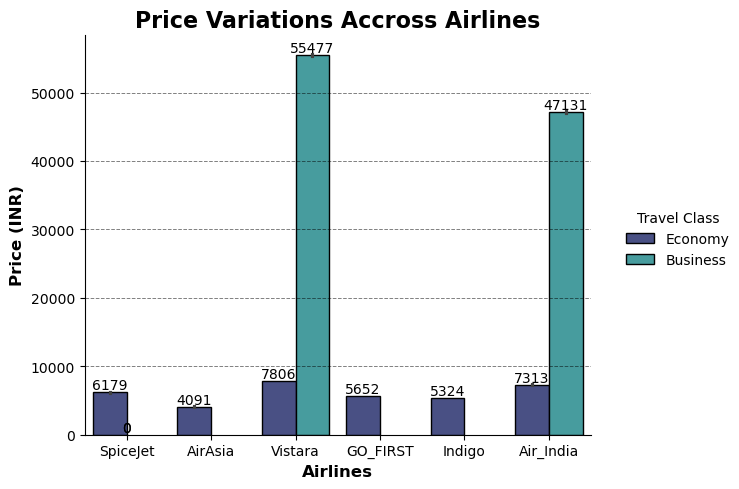

In [25]:
# plotting
plt.figure(figsize=(10,4))

ax = sns.catplot(data=df, x="airline", y="price", kind="bar", palette= 'mako', hue='class', legend= True, edgecolor='black', linewidth=1)

plt.title('Price Variations Accross Airlines', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Airlines', fontdict={'fontsize': 12, 'fontweight':'bold'})
plt.ylabel('Price (INR)', fontdict={'fontsize': 12, 'fontweight':'bold'})
plt.grid(axis='y', alpha= 0.5, linestyle='--', color='black', linewidth=0.7)
ax._legend.set_title('Travel Class')
ax._legend.set_bbox_to_anchor((1,0.5))
ax._legend.set_loc('center left')

for bar in ax.ax.patches:
    ax.ax.annotate(
        f"{int(bar.get_height())}",
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='bottom', fontsize=10
    )

plt.tight_layout()
plt.show()

### Price Variations Across Airlines — Economy vs Business Class

This chart compares **ticket prices** for different airlines across **Economy** and **Business** class.

- **Vistara** has the **highest Business Class prices**, far above all competitors.  
- **Air India** also shows high Business fares, ranking just below Vistara.  
- In **Economy Class**, prices remain relatively similar across all airlines.  
- **SpiceJet** and **AirAsia** tend to offer the **lowest fares**, especially in Economy.  

**Insight:**  
There is a **large price gap** between premium airlines (Vistara, Air India) and low-cost carriers (SpiceJet, AirAsia) in Business Class. However, **Economy fares remain competitive and tightly grouped**, reflecting strong price sensitivity in that segment.


## Does Ticket Price change based on the Departure Time and Arrival Time?

In [26]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [27]:
# checking ticket price variation during departure time
df.groupby('departure_time')['price'].mean()

departure_time
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Late_Night        9295.299387
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

In [28]:
# checking ticket price variation during arrival time
df.groupby('arrival_time')['price'].mean()

arrival_time
Afternoon        18494.598993
Early_Morning    14993.139521
Evening          23044.371615
Late_Night       11284.906078
Morning          22231.076098
Night            21586.758341
Name: price, dtype: float64

**Visualizing Ticket Price Variation during Departure Time and Arrival Time**

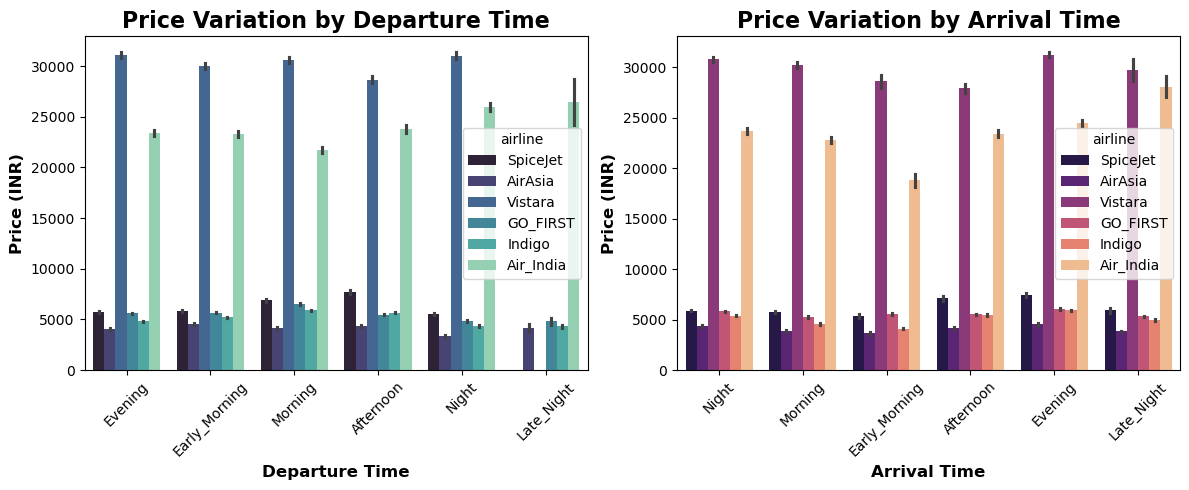

In [29]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
ax = sns.barplot(data=df, x='departure_time', y='price', hue='airline', palette='mako')
plt.title("Price Variation by Departure Time", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Departure Time', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel("Price (INR)", fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xticks(rotation=45)

plt.subplot(1,2,2)
sns.barplot(data=df, x='arrival_time', y='price', hue='airline', palette='magma')
plt.title("Price Variation by Arrival Time", fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel("Arrival Time", fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.ylabel("Price (INR)", fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

###  Price Variation by Departure & Arrival Time

This chart compares **ticket prices** across different airlines based on **Departure Time** and **Arrival Time**.

* **Morning** and **Early Morning** show the **highest departure prices** across most airlines.
* **Evening** departures also display noticeably **elevated fares**.
* For arrivals, **Evening** and **Morning** time slots generally show **higher ticket prices**.
* **Late Night** and **Early Morning** arrivals tend to have **lower prices**, reflecting off‑peak demand.

**Insight:**
Peak travel periods (Morning & Evening) align with **higher ticket prices**, indicating strong passenger demand. Off‑peak times, especially Late Night, show **significantly lower fares**, making them more cost‑effective for travelers.

## How the price changes with change in Source City and Destination City?

In [30]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [31]:
# Checking Price for each Source City
df.groupby('source_city')['price'].mean()

source_city
Bangalore    21469.460575
Chennai      21995.339871
Delhi        18951.326639
Hyderabad    20155.623879
Kolkata      21746.235679
Mumbai       21483.818839
Name: price, dtype: float64

In [32]:
# Checking Price for each Destination City
df.groupby('destination_city')['price'].mean()

destination_city
Bangalore    21593.955784
Chennai      21953.323969
Delhi        18436.767870
Hyderabad    20427.661284
Kolkata      21959.557556
Mumbai       21372.529469
Name: price, dtype: float64

**Visualizing Price Variation based on Source and Destination City**

<Figure size 1600x400 with 0 Axes>

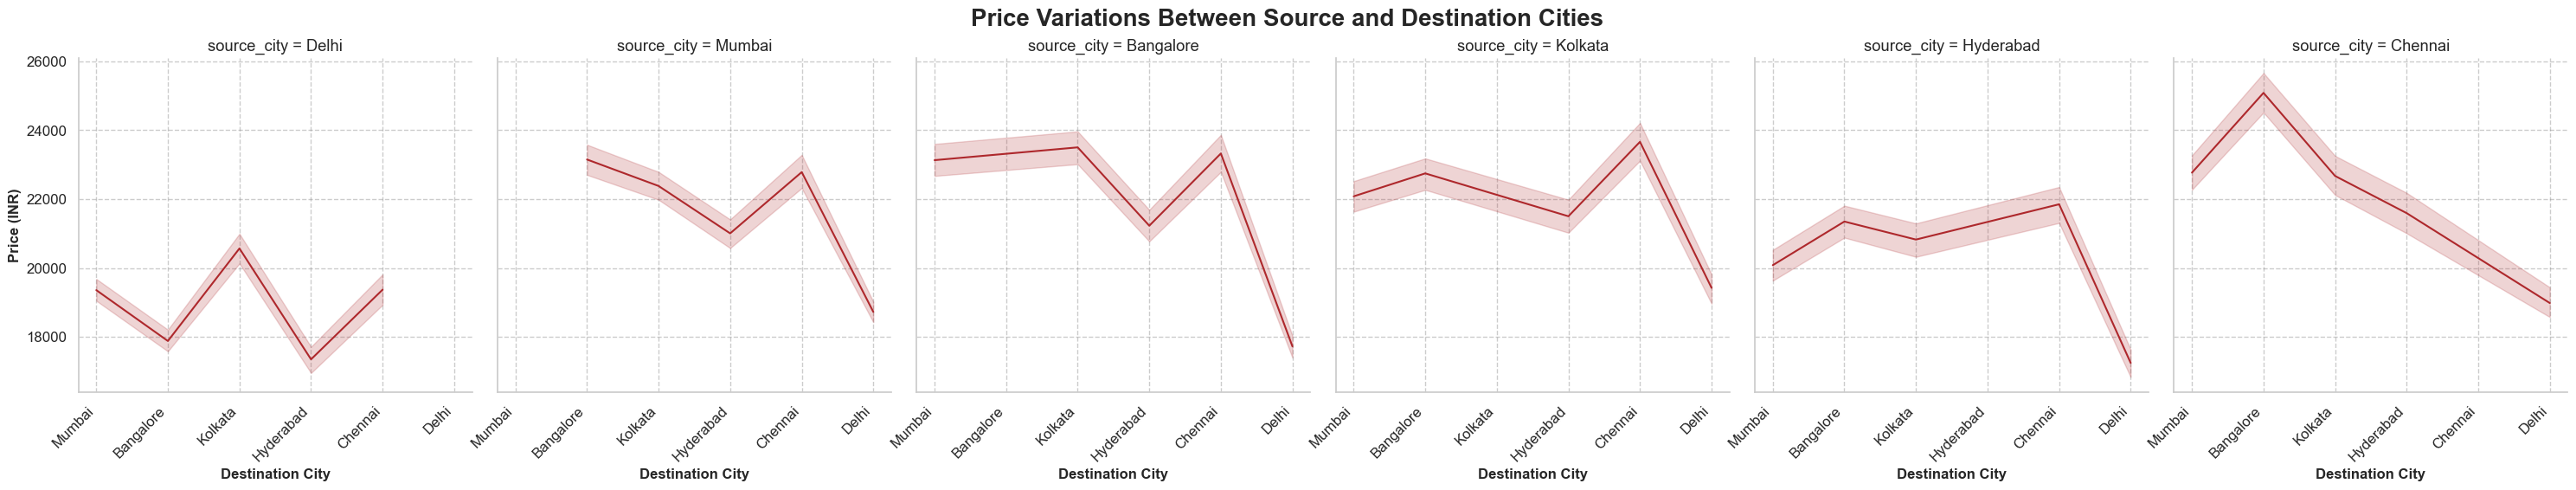

In [33]:
# plotting
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.figure(figsize=(16,4))

p = sns.relplot(data = df, x = 'destination_city', y = 'price', col = 'source_city', kind = 'line', color = '#ae282c')
p.set_xticklabels(rotation = 45, ha='right')
p.set_axis_labels("Destination City", "Price (INR)", fontsize = 12, fontweight = 'bold')
p.fig.suptitle("Price Variations Between Source and Destination Cities", y = 1.03, fontsize = 20, fontweight = 'bold')
for ax in p.axes.flat:
    ax.grid(axis="y", alpha=0.4, linestyle= '--', color = 'grey')
    ax.grid(axis="x", alpha=0.4, linestyle= '--', color = 'grey')


plt.show()

### Price Variations Between Source and Destination Cities

This visual analysis shows how **ticket prices fluctuate** for different **source–destination city pairs**.

* Each subplot represents a **specific source city** (Delhi, Mumbai, Bangalore, Kolkata, Hyderabad, Chennai).
* Prices vary significantly based on the **destination**, even when the source city remains the same.
* Some routes (e.g., **Kolkata → Mumbai**, **Chennai → Delhi**) show noticeably **higher price peaks**.
* Other routes remain relatively stable with smaller fluctuations.

**Insight:**
Ticket prices depend heavily on the **source–destination pair** rather than either city alone. High-traffic or long-distance routes tend to show **steeper price variations**, while shorter or less popular routes display more consistent pricing.


## How is the Price affected when tickets are bought in just 1 or 2 days before Departure?


In [34]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [35]:
df['days_left'].nunique()

49

In [36]:
df['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [37]:
# checking mean ticket price based on days left for departure
df.groupby('days_left')['price'].mean()

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

**Visualizing Price Variation based on Days Left for Departure**

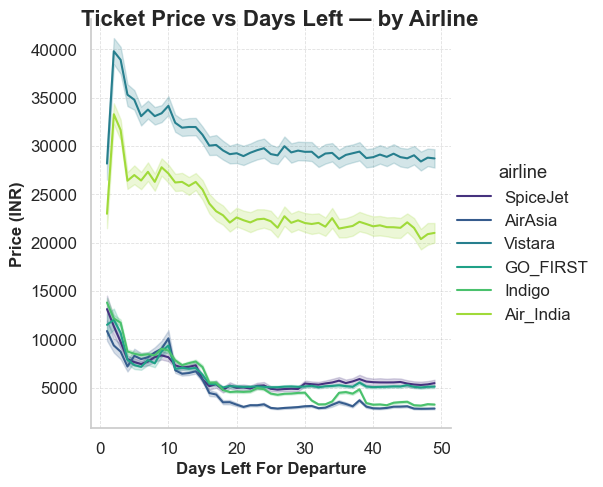

In [38]:
# plotting
t = sns.relplot(data = df, x = 'days_left', y = 'price', kind = 'line', palette = 'viridis', hue = 'airline')
t.fig.suptitle("Ticket Price vs Days Left — by Airline", fontsize=16, fontweight="bold")
t.set_axis_labels('Days Left For Departure', 'Price (INR)', fontsize = 12, fontweight = 'semibold')

for ax in t.axes.flat:
    ax.grid(axis = 'y', linestyle = '--', linewidth = 0.6, alpha = 0.3, color = '#999999')
    ax.grid(axis = 'x', linestyle = '--', linewidth = 0.6, alpha = 0.3, color = '#999999')

plt.show()

###  Ticket Price vs Days Left for Departure — by Airline

This line chart shows how **ticket prices change** as the number of **days left before departure** decreases across different airlines.

* Prices **drop sharply** as the departure date approaches for all airlines.
* After the initial drop, prices tend to **stabilize** around a lower range close to the travel date.
* Airlines like **Vistara** and **Air India** consistently show **higher price curves** compared to low-cost carriers.
* Budget airlines such as **SpiceJet** and **AirAsia** maintain **lower price ranges** throughout.

**Insight:**
Passengers can save significantly by booking **closer to the departure date**, especially on budget carriers. Premium airlines maintain higher fare levels regardless of how early or late the booking occurs.

## How does the ticket price vary between Economy and Business Class?

In [39]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [40]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [41]:

mean_econ = df[df['class'] == 'Economy']['price'].mean()
mean_econ

np.float64(6572.342383362527)

In [42]:
mean_busi = df[df['class']=='Business']['price'].mean()
mean_busi

np.float64(52540.08112357868)

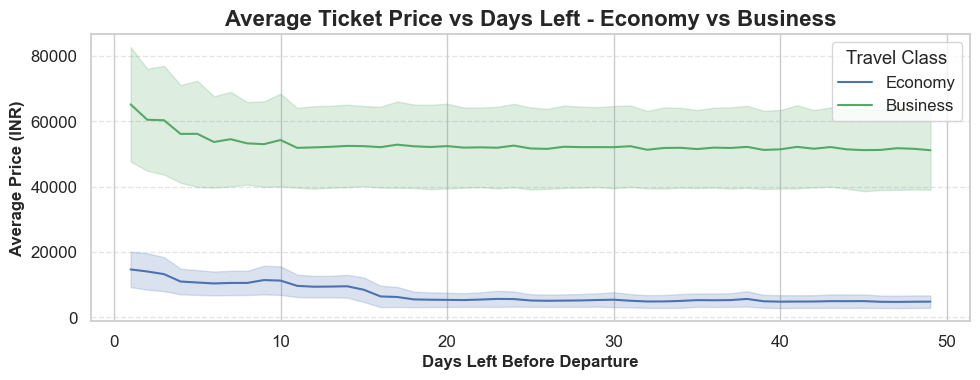

In [43]:
plt.figure(figsize=(10,4))

sns.lineplot(data = df, x = 'days_left', y = 'price', hue = 'class', estimator = 'mean', errorbar = 'sd', palette = ['#4C72B0','#55A868'])
plt.title("Average Ticket Price vs Days Left - Economy vs Business", fontsize = 16, fontweight = 'bold')
plt.xlabel('Days Left Before Departure', fontsize = 12, fontweight = 'semibold')
plt.ylabel("Average Price (INR)", fontsize = 12, fontweight = 'semibold')
plt.legend(title = 'Travel Class')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()

### Average Ticket Price vs Days Left — Economy vs Business

This line chart compares the **average ticket price** for **Economy** and **Business** classes as the number of **days left before departure** decreases.

* **Business Class** fares remain significantly **higher** than Economy throughout the timeline.
* Both classes show slight fluctuations but **no major price drop** as the departure date approaches.
* Economy prices remain **stable and much lower**, making it the more budget-friendly option.
* The price gap between Business and Economy stays **consistently wide** across all days.

**Insight:**
Unlike some dynamic pricing patterns, both Economy and Business fares remain relatively **stable regardless of booking time**. The **premium gap** between Business and Economy persists throughout, indicating that booking earlier may not drastically change ticket pricing for either class.

## What will be the Average Price of Vistara Airline for a flight from Delhi to Hyderabad in Business Class?

In [44]:
df.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


In [45]:
filtered_data = df[(df['airline']=='Vistara') & (df['source_city']=='Delhi') & (df['destination_city']=='Hyderabad') & (df['class']=='Business')]
filtered_data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
219123,Vistara,UK-871,Delhi,Night,zero,Night,Hyderabad,Business,2.33,1,30630
219124,Vistara,UK-879,Delhi,Evening,zero,Evening,Hyderabad,Business,2.25,1,38470
219129,Vistara,UK-955,Delhi,Evening,one,Night,Hyderabad,Business,27.17,1,63513
219130,Vistara,UK-955,Delhi,Evening,one,Afternoon,Hyderabad,Business,18.50,1,65764
219131,Vistara,UK-985,Delhi,Evening,one,Night,Hyderabad,Business,25.08,1,69113
...,...,...,...,...,...,...,...,...,...,...,...
221863,Vistara,UK-963,Delhi,Morning,one,Early_Morning,Hyderabad,Business,23.00,49,53937
221864,Vistara,UK-985,Delhi,Evening,one,Early_Morning,Hyderabad,Business,12.00,49,59537
221865,Vistara,UK-985,Delhi,Evening,one,Afternoon,Hyderabad,Business,16.42,49,59537
221866,Vistara,UK-955,Delhi,Evening,one,Early_Morning,Hyderabad,Business,14.08,49,61889


In [46]:
print("Average Price of Vistara Airline for a flight from Delhi to Hyderabad in Business Class:\n",filtered_data.price.mean())

Average Price of Vistara Airline for a flight from Delhi to Hyderabad in Business Class:
 47939.840361445786


**Visualizing Price Trend - Vistara Business Class (Delhi -> Hyderabad)**

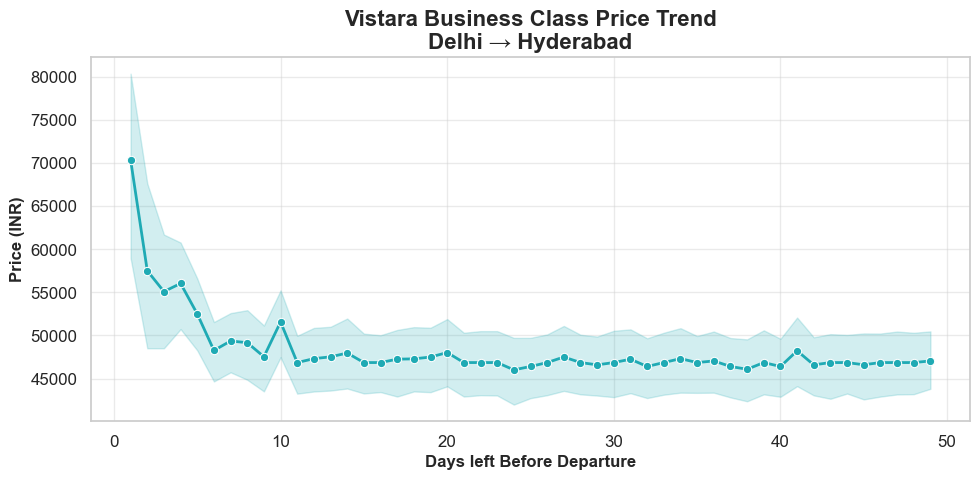

In [47]:
plt.figure(figsize=(10,5))

sns.lineplot(data = filtered_data, x = 'days_left', y = 'price', marker = 'o', linewidth = 2,  color ="#1faab4")
plt.title('Vistara Business Class Price Trend\nDelhi → Hyderabad', fontsize = 16, fontweight = 'bold')
plt.xlabel("Days left Before Departure", fontsize = 12, fontweight = 'semibold')
plt.ylabel("Price (INR)", fontsize = 12, fontweight = 'semibold')

plt.grid(alpha = 0.4)
plt.tight_layout()
plt.show()

###  Vistara Business Class Price Trend — Delhi → Hyderabad

This chart visualizes how **Vistara’s Business Class ticket prices** change as the number of **days left before departure** decreases.

* Prices start **very high** when the journey is 40–50 days away.
* A **sharp decline** occurs within the first few days of the timeline.
* After this drop, prices **stabilize** around a lower, more consistent range.
* Minor fluctuations appear, but no major spikes occur closer to the departure date.

**Insight:**
Vistara’s Business Class pricing follows a pattern where **early bookings are significantly more expensive**, while fares **settle into a stable band** as the travel date approaches. Travelers booking too early may end up paying a premium unnecessarily.

###  **Conclusion — Airline Flight Price Analysis**

This analysis provides a clear understanding of how airline ticket pricing behaves across multiple influencing factors such as **airline type**, **travel class**, **source–destination routes**, **departure/arrival times**, and **booking proximity**. The results reflect meaningful patterns that align with real-world airline pricing strategies.

---

###  **Key Insights**

* Premium airlines consistently maintain **higher fare ranges**, especially in Business Class.
* **Economy fares** remain relatively stable and competitive across carriers.
* Ticket prices vary more by **route combination** than by individual cities.
* **Peak-hour flights** (Morning & Evening) are priced higher due to stronger demand.
* Prices often **stabilize closer to the travel date**, suggesting early bookings do not always guarantee the lowest fares.

---

### **Overall Interpretation**

Airline pricing reflects a balance between **market demand**, **route significance**, and **airline positioning strategies**. 

---

### **Prepared By**
**Soumojit Maitra**
*(B.Tech CSE — AIML, Year 2)*
